In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import re

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [5]:
df = df.iloc[:100000, :]

Sentiment analysis using NLTK

In [10]:
example = df['Text'][0]
print(example)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [12]:

def preprocess_text(text):
    
    # Ensure input is a string
    text = str(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove HTML tags
    text = re.sub(r"<.*?>", '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#\w+', '', text)
    
    # Remove non-alphanumeric characters (retain spaces)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    
    # Tokenize the text (split into words)
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Rejoin words into a single string
    text = ' '.join(words)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text




In [14]:
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

sia = SentimentIntensityAnalyzer()
df['Sentiment_Scores'] = df['Cleaned_Text'].apply(lambda x: sia.polarity_scores(x))

sentiment_df = pd.json_normalize(df['Sentiment_Scores'])
df = pd.concat([df, sentiment_df], axis=1)

df = df.drop(columns=['Sentiment_Scores'])


C:\Users\Prasad\AppData\Local\Temp\ipykernel_16096\2111955534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Text'] = df['Text'].apply(preprocess_text)
C:\Users\Prasad\AppData\Local\Temp\ipykernel_16096\2111955534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_Scores'] = df['Cleaned_Text'].apply(lambda x: sia.polarity_scores(x))


In [18]:
df.to_csv("Preprocessed_text.csv")

In [20]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around century light pillowy citrus...,0.132,0.576,0.292,0.8624
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...,love buy another box im done last one,0.000,0.625,0.375,0.6369
99996,99997,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,late father law used rating system meal partic...,0.013,0.721,0.266,0.9809
99997,99998,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,favorite brand korean ramen spicy used eating ...,0.000,0.657,0.343,0.8555
99998,99999,B000LQORDE,A9Q950IPXJR1D,"Lynda ""casual customer""",2,5,4,1237161600,Spicy!!,"I do like these noodles although, to say they ...",like noodle although say spicy somewhat unders...,0.081,0.685,0.234,0.6549


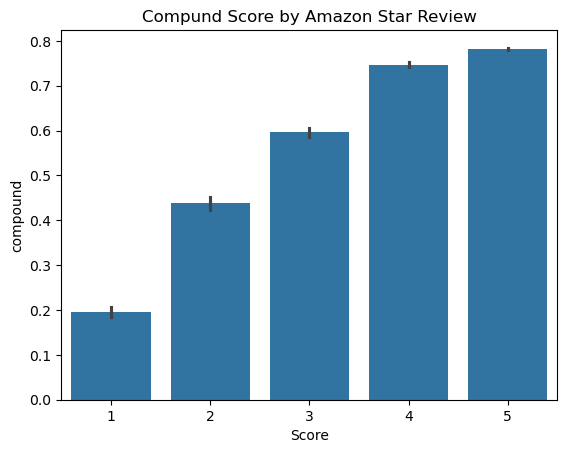

In [24]:
ax = sns.barplot(data=df, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

Roberta Pretrained Model

In [9]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import torch
from scipy.special import softmax

In [10]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [12]:
def polarity_scores_roberta_batch(texts):
    # Tokenize the batch of texts with truncation and padding
    encoded_texts = tokenizer(
        texts, 
        truncation=True, 
        padding=True, 
        max_length=512,
        return_tensors='tf'
    )
    outputs = model(**encoded_texts)
    scores = softmax(outputs.logits.numpy(), axis=1)
    scores_dict = [{
        'roberta_neg': score[0],
        'roberta_neu': score[1],
        'roberta_pos': score[2]
    } for score in scores]
    return scores_dict

In [15]:
batch_size = 32  
roberta_scores = []

for i in range(0, 1000, batch_size):
    texts_batch = df['Text'][i:i+batch_size].tolist()
    batch_scores = polarity_scores_roberta_batch(texts_batch)
    roberta_scores.extend(batch_scores)


In [17]:
roberta_df = pd.DataFrame(roberta_scores)
roberta_df['Id'] = df['Id'][:len(roberta_scores)].values  

roberta_df = roberta_df.merge(df, how='left', on='Id')

roberta_df.to_csv('roberta_sentiment_scores.csv', index=False)

In [19]:
roberta_df

,roberta_neg,roberta_neu,roberta_pos,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0.009624,0.049980,0.940396,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0.508986,0.452413,0.038600,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,0.003229,0.098067,0.898704,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,0.002295,0.090219,0.907486,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,0.001635,0.010302,0.988063,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.006334,0.034390,0.959275,1020,B001E6KBSK,A1OC93L36EHWWJ,The Loon,0,0,5,1342569600,cereal,This cereal is difficult to find in the stores...
1020,0.148663,0.281710,0.569627,1021,B001E6KBSK,A1CLBQQ7A77FSI,LINDA K. RINGLE,2,4,5,1287100800,"This is good, but bring back ""Just Right"" cereal",You could find this in local supermarkets abou...
1021,0.010048,0.053972,0.935981,1022,B001E6KBSK,A1J2FKMZPW32HV,Goodwin Deacon,0,1,5,1315094400,Favorite cereal,This has been my favorite cereal for probably ...
1022,0.015718,0.038105,0.946177,1023,B001E6KBSK,A1W5FYWEWDH25R,J.FELICIANO,0,1,5,1314316800,AWESOME CEREAL,I LOVE THIS CEREAL. NOT ONLY DOES IT TASTE GO...
